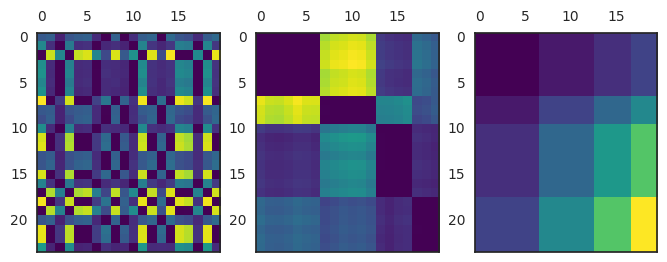

In [67]:
import itertools
import numpy as np
import sklearn
from sklearn.cluster.bicluster import SpectralBiclustering
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')
plt.rcParams['image.cmap'] = 'viridis'
%matplotlib inline

properties = ['salt', 'roast', 'grease', 'crunch']

clusters = {
    'more-is-more': [1., 1., 1., .1],
    'natural': [0., 0.1, 0.1, 0.4],
    'ok-but-too-salt': [0.8, 0.5, 0.5, .5],
    'dry-and-soft': [0.5, 0.5, 0.1, 0.2]
}

M = 24
N = 20

def nut_generator(clusters):
    cluster_names = list(clusters.keys())
    while True:
        yield clusters[np.random.choice(cluster_names)] + 0.1 * np.random.random(len(properties))

ng = nut_generator(clusters)
people = np.stack([next(ng) for i in range(M)])
nuts = np.stack([next(ng) for j in range(N)])

def make_scores(people, nuts):
    scores = np.zeros((M, N))
    for (i, p), (j, n) in itertools.product(enumerate(people), enumerate(nuts)):
        closeness = sum((p - n) ** 2)
        scores[i, j] = closeness
    return scores

def fit_model(scores, n_clusters):
    model = SpectralBiclustering(
        n_clusters=n_clusters, method='log', random_state=0)
    model.fit(scores)
    return model

def sort_scores(scores, model):
    sorted_scores = scores[np.argsort(model.row_labels_)]
    sorted_scores = sorted_scores[:, np.argsort(model.column_labels_)]
    return sorted_scores
    
def simulate_and_plot(scores, n_clusters):
    model = fit_model(scores, n_clusters)
    sorted_scores = sort_scores(scores, model)

    fig, ax = plt.subplots(1, 3, figsize=(8, 10))
    ax[0].matshow(scores)
    ax[1].matshow(sorted_scores)
    
    ax[2].matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1))

simulate_and_plot(make_scores(people, nuts), (4, 4))

In [59]:
m = fit_model(make_scores(people, nuts), (4, 4))

In [60]:
m.row_labels_

array([0, 3, 3, 0, 2, 2, 2, 0, 3, 1, 2, 3, 0, 2, 1, 0, 1, 2, 3, 1, 1, 1, 0,
       0], dtype=int32)

In [61]:
m.column_labels_

array([2, 1, 3, 3, 1, 2, 1, 3, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 3, 1], dtype=int32)

In [62]:
nuts

array([[ 0.52442043,  0.59527672,  0.15570461,  0.29162125],
       [ 1.0273151 ,  1.08054536,  1.03245918,  0.11849566],
       [ 0.81015919,  0.58282345,  0.59664599,  0.53811084],
       [ 0.89633567,  0.58864889,  0.50445888,  0.51776221],
       [ 1.00892062,  1.09952006,  1.05837182,  0.17789475],
       [ 0.56721842,  0.54178009,  0.17397819,  0.21733502],
       [ 1.0763225 ,  1.0323715 ,  1.01881445,  0.10570382],
       [ 0.86212452,  0.59676999,  0.58186371,  0.56296941],
       [ 0.52025044,  0.56300788,  0.10940975,  0.29502107],
       [ 0.51387971,  0.53399956,  0.1563381 ,  0.24343782],
       [ 0.05369577,  0.14949336,  0.13534148,  0.4109382 ],
       [ 0.05395349,  0.10561999,  0.13718357,  0.46295531],
       [ 0.02083705,  0.19126035,  0.19563942,  0.48557957],
       [ 1.0277467 ,  1.05870263,  1.02863334,  0.19050092],
       [ 1.02369126,  1.07275763,  1.06366079,  0.13481691],
       [ 0.03468019,  0.10634811,  0.13590837,  0.45880233],
       [ 1.0676556 ,  1.

In [63]:
pca = sklearn.decomposition.PCA(len(properties))
pca.fit(nuts)
pca.fit_transform(nuts)

array([[ -3.50510800e-01,   1.37623886e-01,   1.88094501e-01,
          5.43691167e-02],
       [  7.51552472e-01,   9.75685287e-02,  -7.27126276e-02,
          5.96365549e-04],
       [  3.22388346e-02,  -2.66958641e-01,   2.93137168e-02,
          1.44630590e-02],
       [  3.24387866e-02,  -2.60926813e-01,   1.54216039e-01,
         -1.26633000e-02],
       [  7.57240722e-01,   5.80362558e-02,  -1.00495111e-01,
          5.09062960e-02],
       [ -3.31686976e-01,   1.57415216e-01,   1.91268615e-01,
         -4.45743905e-02],
       [  7.47720168e-01,   7.37112294e-02,  -4.06038724e-02,
         -5.82035150e-02],
       [  5.65423435e-02,  -2.98031776e-01,   7.55184512e-02,
          2.08103394e-02],
       [ -3.98522098e-01,   1.33468281e-01,   2.14639590e-01,
          4.07146648e-02],
       [ -3.81152935e-01,   1.56684487e-01,   1.69822120e-01,
         -1.30987545e-02],
       [ -8.89125387e-01,   4.56460692e-02,  -1.73199554e-01,
         -2.21600553e-02],
       [ -9.19610145e

In [64]:
import itertools

In [70]:
pd.DataFrame(nuts, columns=properties, index=['A{}'.format(i+1) for i in range(len(nuts))])

,salt,roast,grease,crunch
A1,1.074133,1.084372,1.083503,0.197950
A2,0.082490,0.187031,0.147767,0.437418
A3,0.577759,0.561047,0.168419,0.292571
A4,1.032580,1.070643,1.013193,0.118925
A5,0.084407,0.197363,0.150619,0.442572
A6,0.072242,0.178106,0.132576,0.448494
A7,0.591689,0.590046,0.141178,0.204849
A8,0.897971,0.570069,0.578913,0.511760
A9,0.079641,0.175422,0.123638,0.427578
A10,0.801162,0.532278,0.531430,0.578178


In [73]:
def plot_pairs(data, colnames, max_cols=3):
    rows = int(np.ceil(len(colnames) / max_cols))
    cols = min(max_cols, len(colnames))
    pairs = list(itertools.combinations(enumerate(colnames), 2))
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    for ((ia, propa), (ib, propb)), ax in zip(pairs, axs.flat):
        ax.plot(data[:, ia], data[:, ib], '.k')
        ax.set_xlabel(propa)
        ax.set_ylabel(propb)
        fig.tight_layout()

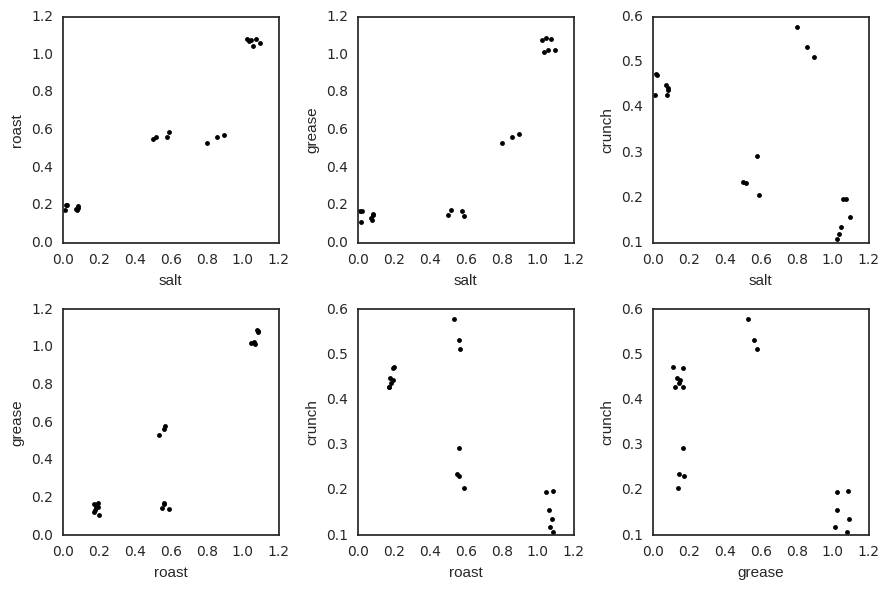

In [74]:
plot_pairs(nuts, properties)

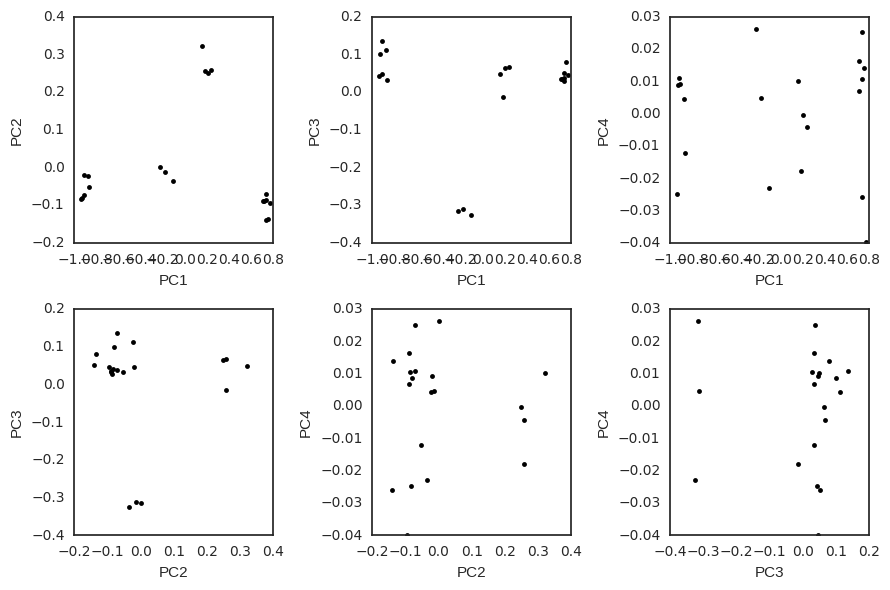

In [75]:
plot_pairs(sklearn.decomposition.PCA().fit_transform(nuts), ['PC{}'.format(i+1) for i in range(len(properties))])